# Object detection with (Fast(er)) RCNNs

Sander van Dijk @ Parkopedia

18-05-2020

# First off: what is Object Detection

* Computer Vision problem involving:
    
    * Finding bounding boxes of objects in images
    * Classifying corresponding objects

<center><img src="figs/objectdetection.png" style="width: 40%"></center>

# History of Deep Neural Object Detection
<center><img src="figs/timeline.png"></center>

<center><img src="figs/rcnn-paper-title.png"></center>

<center><img src="figs/rcnn-paper-abstract.png" style="width: 70%"></center>

# State of object detection in 2013

* State of the art: ensemble methods based on SIFT and HOG features
* Slow progress 2010--2012
* AlexNet disrupted image classifaction (ImageNet) in 2012


* R-CNN: _"bridging  the  gap  between image classification and object detection"_

# Not trivial: what is the output?

* Classification/segmentation 'easy': fixed input and output size
* Object detection: any number of objects of any size, possibly overlapping


* Solutions discussed by authors:

    * Slide classification network over image. Problem: large receptive field $\rightarrow$ bad localisation
    * 2 step: generate regions of interest (ROIs), then classify

# R-CNN - Process

<center><img src="figs/rcnn-process.png"></center>

# R-CNN - Process Details

* Can use any existing category-independent region proposal method. Used: _selective search_
* Simple affine warping so regions fit CNN input
* CNN: AlexNet pre-trained on ILSVRC2012 classification data, fine-tuned with warped regions
* Training classifiers:

    * Positive examples: ground truth bounding boxes
    * Negative exampels: IoU < 0.3

* Test-time detection:

    * Classifiers output confidence per class
    * Greedy non-maximum suppression based on learned threshold.

# R-CNN - Extra bits
* Linear regression of transformation functions for box refinement


$$ \hat{G}_x = P_w d_x(P) + P_x $$
$$ \hat{G}_y = P_h d_y(P) + P_y $$
$$ \hat{G}_w = P_w \exp(d_w(P)) $$
$$ \hat{G}_h = P_h \exp(d_h(P)) $$



* Simple translation to semantic segmantion: using existing segmentation proposal methods (min-cut based)

# R-CNN: Conclusion

* Much better scores!
* "Fast", "efficient", "13s/image on a GPUor 53s/image on a CPU"(!!)

> <span style=" font-family: Linux Libertine O"><span style="font-size: 125%">We conclude by noting that it is significant that we achieved these results by using a **combination** of classical tools from **computer vision _and_ deep learning** (bottom-up region proposals and convolutional neural networks). Rather than opposing lines of scientific inquiry, the two are natural and **inevitable partners**.</span></span>

<center><img src="figs/fast-rcnn-paper-title.png" style="width: 373px"></center>

<center><img src="figs/fast-rcnn-paper-abstract.png" style="width: 70%"></center>

# Fast R-CNN - main contributions

<br>

### 1.  STate of the art detection quality (better than R-CNN)
### 2.  Training is single-stage, using a multi-task loss

# Fast R-CNN - Process

<center><img src="figs/fast-rcnn-process.png"></center>

# Fast R-CNN - Process

<center><img src="figs/fast-rcnn-process.png" style="width: 50%"></center>

Main improvements from R-CNN:
* Single feature extraction pass, vs one for each region
* SVM replaced by softmax
* Box refinement/regression part of NN 

<img src="figs/fast-rcnn-process.png" style="width: 40%; float: right">

# Fast R-CNN - Head details


### RoI pooling
* To scale random size RoI features to fixed $6 \times 6$ size
* Max-pooling with $6 \cdot 6$ pools

### Bounding box regressor
* Outputs normalised, relative translation and scale refinements

### Multi-task loss
$$
L(p,u,t^u,v) = L_{\text{cls}}(p,u) +\lambda[u \geq 1]L_{\text{loc}}(t^u,v)
$$

# Fast R-CNN - Conclusion

* Versus R-CNN:

    * Processing: 146-213 $\times$ faster (47s to 0.32s per image)
    * Training: 9 $\times$ faster (84 to 9.5 hours)
    
* Training bbox regression concurrently _improves_ classification head
* Softmax now is better/not worse than SVM
* Flooding network with regions makes it worse


* **Still**: separate object proposal system

<center><img src="figs/faster-rcnn-paper-title.png"></center>

<center><img src="figs/faster-rcnn-paper-abstract.png"></center>

# Faster R-CNN - main contributions

<br>

### 1.  State of the art detection quality (better than Fast R-CNN)
### 2.  Detection is single-stage, using feature sharing to get proposals

# Faster R-CNN - process

<center><img src="figs/faster-rcnn-process.png"></center>

# Anchors continued
* Receptive field sliding window/256-d features: 228 $\times$ 228, total stride: 16 pixels
* 3 anchor sizes: $128^2$, $256^2$, and $512^2$ pixels
* 3 aspect ratios of: 1:1, 1:2, and 2:1


* Anchors are "novel scheme for addressing multiple scales"

    * "Old": image/feature pyramids, or multi-scale windows on feature map

# Faster R-CNN - training

* RPN: multi-task loss - classification (object or not) vs bbox regression
* Bounding box regression similar to (Fast) R-CNN, but starting from anchors
* Whole system 2 networks (detection (Fast R-CNN) + RPN) sharing initial conv layers, trained alternatingly in 4 steps:

    1. Train region proposal network
    1. Train separate detector with RPN proposals
    1. Reinitialise new RPN with fixed conv layers of detector, tune only RPN specific layers
    1. Fix conv layers and RPN, tune detector specific layers

# Faster R-CNN - conclusion

> <span style=" font-family: Linux Libertine O"><span style="font-size: 125%">We  have  presented  RPNs  for  efficient  and  accurate region proposal generation. By sharing convolutional features with the down-stream detection network, the region proposal step is nearly  cost-free. Our method enables **a unified, deep-learning-based object  detection system** to run at near real-time frame rates. The learned  RPN also improves region proposal quality and thus the overall object detection accuracy.</span></span>


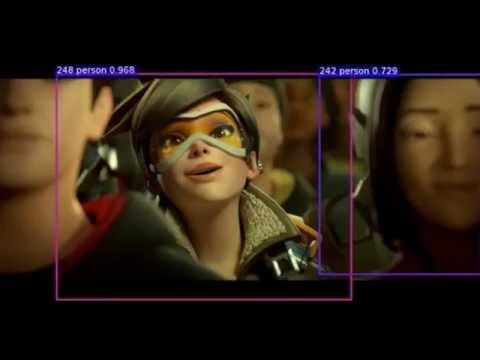

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('hALKoGdEb-8', width=1280, height=720)